In [7]:
import os, sys
import xml.etree.ElementTree as et
import pandas as pd
import ROOT as r
from tqdm import tqdm_notebook, trange

%cd /home/naodell/work/CMS/z_plus_jpsi

/home/naodell/work/CMS/z_plus_jpsi


In [62]:
infile   = 'data/lhe/unweighted_events.lhe'
lhe_data = open(infile).read()
tree     = et.XML(lhe_data)

entry_list = []
event_count = 0
for event in tqdm_notebook(tree):
    if event.tag != "event":
        continue
    else:
        event_count += 1
    
    particle_list = event.text.split("\n")[2:-1]
    for i, particle in enumerate(particle_list):
        particle_info = particle.split()
        entry_dict = {}
        
        # event level info
        entry_dict['event'] = event_count
        entry_dict['entry'] = i
        entry_dict['pdg_id'] = float(particle_info[0])
        entry_dict['status'] = float(particle_info[1])
        entry_dict['mother'] = float(particle_info[2])
        entry_dict['father'] = float(particle_info[3])
        
        # color info
        entry_dict['color']     = int(particle_info[4])
        entry_dict['anticolor'] = int(particle_info[5])
        
        # kinematic values
        p4 = r.TLorentzVector()
        p4.SetPxPyPzE(float(particle_info[6]), float(particle_info[7]), float(particle_info[8]), float(particle_info[9]))
        entry_dict['pt']   = p4.Pt()
        entry_dict['eta']  = p4.Eta()
        entry_dict['phi']  = p4.Phi()
        entry_dict['mass'] = p4.M()
        
        entry_list.append(entry_dict)
    
df = pd.DataFrame(entry_list)
df.to_pickle('data/lhe/pp_to_zpb.pkl')

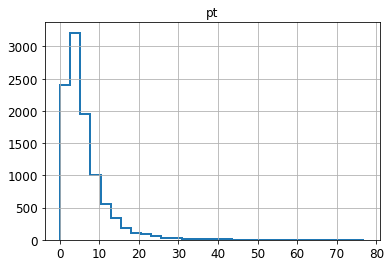

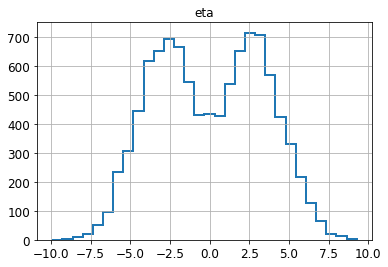

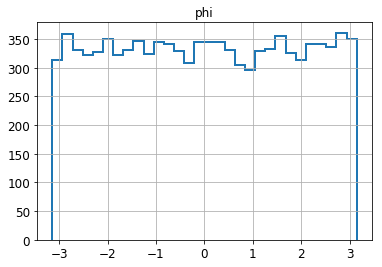

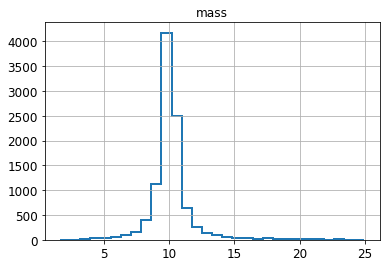

In [105]:
# Now do some visualizations
import matplotlib.pyplot as plt

# Z'
df_zprime = df.query('pdg_id == 32')
df_zprime.hist(column='pt', bins=30, histtype='step', linewidth=2.)
plt.savefig('plots/gen_zprime_test/zprime_pt.pdf')

df_zprime.hist(column='eta', bins=30, histtype='step', linewidth=2.)
plt.savefig('plots/gen_zprime_test/zprime_eta.pdf')

df_zprime.hist(column='phi', bins=30, histtype='step', linewidth=2.)
plt.savefig('plots/gen_zprime_test/zprime_phi.pdf')

df_zprime.hist(column='mass', bins=30, histtype='step', linewidth=2.)
plt.savefig('plots/gen_zprime_test/zprime_mass.pdf')
plt.show()

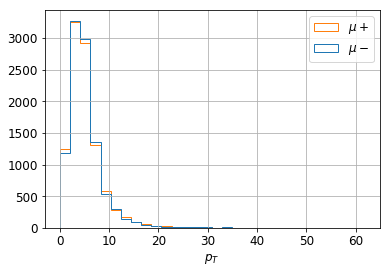

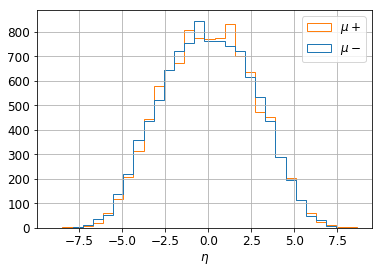

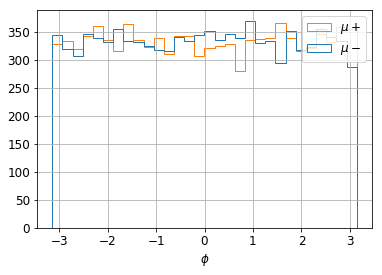

In [103]:
df_muon_plus = df.query('pdg_id == 13')
df_muon_minus = df.query('pdg_id == -13')

plt.hist([df_muon_plus.pt, df_muon_minus.pt], bins=30, histtype='step')
plt.xlabel('$p_{T}$')
plt.legend(['$\mu+$', '$\mu-$'])
plt.savefig('plots/gen_zprime_test/muons_pt.pdf')
plt.show()

plt.hist([df_muon_plus.eta, df_muon_minus.eta], bins=30, histtype='step')
plt.xlabel('$\eta$')
plt.legend(['$\mu+$', '$\mu-$'])
plt.savefig('plots/gen_zprime_test/muons_eta.pdf')
plt.show()

plt.hist([df_muon_plus.phi, df_muon_minus.phi], bins=30, histtype='step')
plt.xlabel('$\phi$')
plt.legend(['$\mu+$', '$\mu-$'])
plt.savefig('plots/gen_zprime_test/muons_phi.pdf')
plt.show()


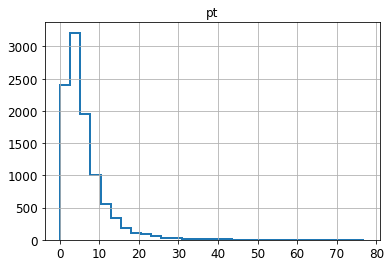

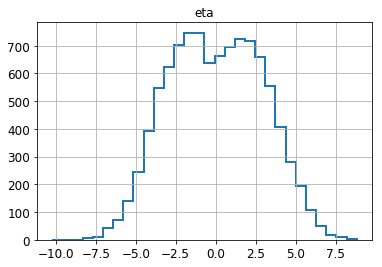

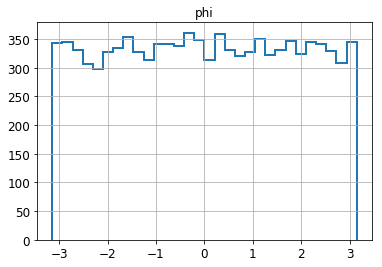

In [104]:
# b quark
df_bquark = df.query('abs(pdg_id) == 5')
df_bquark.hist(column='pt', bins=30, histtype='step', linewidth=2.)
plt.savefig('plots/gen_zprime_test/bquark_pt.pdf')

df_bquark.hist(column='eta', bins=30, histtype='step', linewidth=2.)
plt.savefig('plots/gen_zprime_test/bquark_eta.pdf')

df_bquark.hist(column='phi', bins=30, histtype='step', linewidth=2.)
plt.savefig('plots/gen_zprime_test/bquark_phi.pdf')

plt.show()
